# Hello :)

With this notebook &#128211; you can check, if everything is set up for the incubator course **"Regularization in Image Reconstruction: From Model to Data Driven Methods"**!
We will go over everything in detail, but here's the list of packages we need:

* ```numpy```
* ```matplotlib```
* ```skimage``` (for installation: ```scikit-image```)
* ```torch```
* ```torchvision```

Let's check if everthing works.

## Importing ```numpy```

Let us first check if you can import ```numpy```, the basic package, which we will need for a lot of things. Just try to run the cell below :)

In [1]:
import numpy as np

If it worked, there should be a number displayed to the left side of the cell.

## Importing ```matplotlib```

Working with images, also means looking at images and graphs &#x1F4C8; Here, we need the ```matplotlib``` package  let's test if it works, by running the following cell.

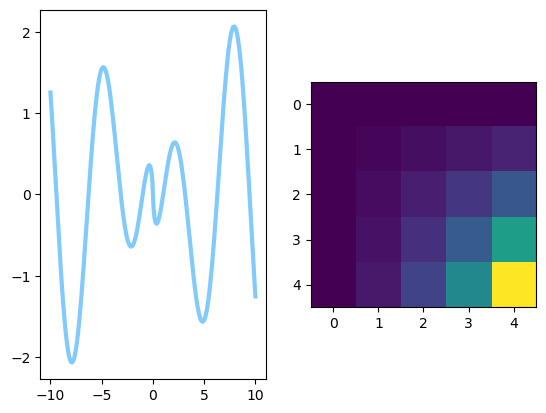

In [2]:
import matplotlib.pyplot as plt
x = np.linspace(-10,10, 200)
I = np.linspace(1,2,5)[:,None]**np.arange(5)

fig, ax = plt.subplots(1, 2, squeeze=False)
ax[0,0].plot(x, np.log(np.abs(x)) * np.sin(x), linewidth=3, color = 'xkcd:sky')
ax[0,1].imshow(I)

Did it work? Great!

## Importing ```skimage```

Next, we test a pretty handy package for image processing named ```skimage```. This allows us to display the most well-known test image in the community...or rather a modern version of it ;)

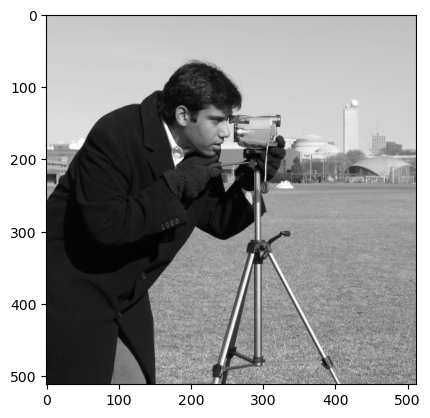

In [3]:
import skimage as ski
from skimage import data, img_as_float

I = img_as_float(data.camera())
plt.imshow(I, cmap='gray')


## Importing ```torch```

For data-driven approaches involving machine-learning and neural networks, the package ```torch``` will help us a lot. Let's see if everything works.

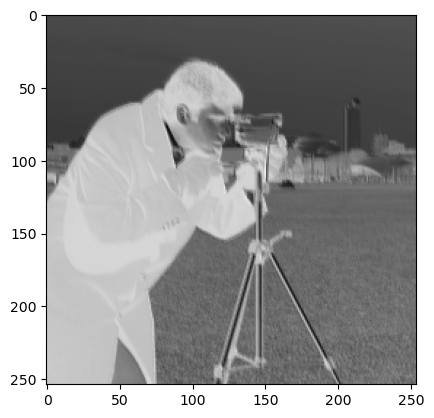

In [4]:
import torch
import torch.nn as nn
import torchvision

conv = nn.Conv2d(1, 1, 6, stride=2)
I_torch = torch.Tensor(I[None, None, :,:])
I_conv = conv(I_torch)

plt.imshow(I_conv.detach()[0,0,...], cmap='gray')